In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

plt.style.use('ggplot')
sns.set(font_scale=1.5)

# Data Preprocessing

In [2]:
btc_data_path = "md/btcusdt:Binance:LinearPerpetual"
eth_data_path = "md/ethusdt:Binance:LinearPerpetual"

In [3]:
btc_lobs_df = pd.read_csv(btc_data_path + '/lobs.csv')
btc_trades_df = pd.read_csv(btc_data_path + '/trades.csv')

eth_lobs_df = pd.read_csv(eth_data_path + '/lobs.csv')
eth_trades_df = pd.read_csv(eth_data_path + '/trades.csv')

In [4]:
btc_columns_mapper = {i: i.replace('btcusdt:Binance:LinearPerpetual_', '').strip() for i in btc_lobs_df.columns}
eth_columns_mapper = {i: i.replace('ethusdt:Binance:LinearPerpetual_', '').strip() for i in eth_lobs_df.columns}

btc_lobs_df.rename(columns=btc_columns_mapper, inplace=True)
eth_lobs_df.rename(columns=eth_columns_mapper, inplace=True)

In [5]:
btc_lobs_df['receive_ts'] = pd.to_datetime(btc_lobs_df['receive_ts'])
btc_lobs_df['exchange_ts'] = pd.to_datetime(btc_lobs_df['exchange_ts'])
btc_trades_df['receive_ts'] = pd.to_datetime(btc_trades_df['receive_ts'])
btc_trades_df['exchange_ts'] = pd.to_datetime(btc_trades_df['exchange_ts'])

eth_lobs_df['receive_ts'] = pd.to_datetime(eth_lobs_df['receive_ts'])
eth_lobs_df['exchange_ts'] = pd.to_datetime(eth_lobs_df['exchange_ts'])
eth_trades_df['receive_ts'] = pd.to_datetime(eth_trades_df['receive_ts'])
eth_trades_df['exchange_ts'] = pd.to_datetime(eth_trades_df['exchange_ts'])

In [6]:
btc_lobs_df.sort_values(by=['exchange_ts'], inplace=True)
btc_trades_df.sort_values(by=['exchange_ts'], inplace=True)

eth_lobs_df.sort_values(by=['exchange_ts'], inplace=True)
eth_trades_df.sort_values(by=['exchange_ts'], inplace=True)

In [7]:
btc_lobs_df.head()

,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,bid_price_7,bid_vol_7,ask_price_8,ask_vol_8,bid_price_8,bid_vol_8,ask_price_9,ask_vol_9,bid_price_9,bid_vol_9
0,2022-06-23 00:00:02.250125991,2022-06-23 00:00:02.249,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.01,19975.6,1.529,19980.2,0.01,19975.4,1.641
1,2022-06-23 00:00:02.657844605,2022-06-23 00:00:02.655,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455
2,2022-06-23 00:00:03.346968722,2022-06-23 00:00:03.346,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455
3,2022-06-23 00:00:04.080791047,2022-06-23 00:00:04.080,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455
4,2022-06-23 00:00:04.452706766,2022-06-23 00:00:04.452,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455


In [8]:
btc_trades_df[(btc_trades_df.price < 1900) | (btc_trades_df.price > 22000)]

,receive_ts,exchange_ts,aggro_side,price,size
4567051,2022-06-23 19:47:25.853109188,2022-06-23 19:47:25.836,ASK,39758.88,0.001
4971473,2022-06-23 20:48:50.557211543,2022-06-23 20:48:50.556,ASK,29817.98,0.001
5028915,2022-06-23 21:04:22.229623269,2022-06-23 21:04:22.227,ASK,29061.08,0.001
5032414,2022-06-23 21:04:52.439506062,2022-06-23 21:04:52.438,ASK,37957.31,0.002
5032499,2022-06-23 21:04:53.518896460,2022-06-23 21:04:53.517,ASK,24246.15,0.038
5032612,2022-06-23 21:04:54.203729877,2022-06-23 21:04:54.202,BID,0.00,0.001


In [9]:
btc_trades_df[btc_trades_df.price > 22000]

,receive_ts,exchange_ts,aggro_side,price,size
4567051,2022-06-23 19:47:25.853109188,2022-06-23 19:47:25.836,ASK,39758.88,0.001
4971473,2022-06-23 20:48:50.557211543,2022-06-23 20:48:50.556,ASK,29817.98,0.001
5028915,2022-06-23 21:04:22.229623269,2022-06-23 21:04:22.227,ASK,29061.08,0.001
5032414,2022-06-23 21:04:52.439506062,2022-06-23 21:04:52.438,ASK,37957.31,0.002
5032499,2022-06-23 21:04:53.518896460,2022-06-23 21:04:53.517,ASK,24246.15,0.038


In [10]:
btc_trades_df.head()

,receive_ts,exchange_ts,aggro_side,price,size
0,2022-06-23 00:00:02.624789714,2022-06-23 00:00:02.623,BID,19977.5,0.001
1,2022-06-23 00:00:05.293556247,2022-06-23 00:00:05.292,BID,19977.5,0.041
2,2022-06-23 00:00:05.293628020,2022-06-23 00:00:05.292,BID,19977.5,0.036
3,2022-06-23 00:00:05.293832021,2022-06-23 00:00:05.292,BID,19977.5,0.001
4,2022-06-23 00:00:05.293929517,2022-06-23 00:00:05.292,BID,19977.5,0.001


# Vizualization

## LOB Vizualization

In [11]:
for level_id in range(10):
    btc_lobs_df[f'spread_{level_id}'] = btc_lobs_df[f'ask_price_{level_id}'] - btc_lobs_df[f'bid_price_{level_id}']
    eth_lobs_df[f'spread_{level_id}'] = eth_lobs_df[f'ask_price_{level_id}'] - eth_lobs_df[f'bid_price_{level_id}']

In [12]:
def vizualize_level_by_tick(lobs_df, level_id, name, number_of_ticks=None):
    fig, axes = plt.subplots(2, figsize=(20, 10), sharex=True)
    
    fig.suptitle(f'{name}: {level_id} Level', fontsize=28, horizontalalignment='center')
    axes[0].set_title('Bid-Ask Dynamics', fontsize=23)
    axes[1].set_title('Bid-Ask Spread', fontsize=23)
    sns.lineplot(data=lobs_df[:number_of_ticks][[f'ask_price_{level_id}', f'bid_price_{level_id}']], ax=axes[0])
    sns.lineplot(data=lobs_df[:number_of_ticks][f'spread_{level_id}'], ax=axes[1])
    axes[1].set_ylabel(None)
    plt.xlabel('Ticks', fontsize=19)
    fig.text(0.03, 0.48, 'USDT', va='center', rotation='vertical', fontsize=19);

In [13]:
def vizualize_level_by_time(lobs_df, level_id, name, number_of_ticks=None, path_to_save=None):
    df_lavel = lobs_df[:number_of_ticks][['exchange_ts', 
                                          f'ask_price_{level_id}', f'bid_price_{level_id}',
                                          f'spread_{level_id}']]
    
    fig, axes = plt.subplots(2, figsize=(20, 10), sharex=True)
    fig.suptitle(f'{name}: {level_id} Level', fontsize=28, horizontalalignment='center')
    axes[0].set_title('Bid-Ask Dynamics', fontsize=23)
    axes[1].set_title('Bid-Ask Spread', fontsize=23)
    sns.lineplot(data=df_lavel.drop(columns=[f'spread_{level_id}']).melt(id_vars='exchange_ts'),
                                    x='exchange_ts', y='value', hue='variable', legend=False, ax=axes[0])
    axes[0].legend(loc='upper left', labels=['Ask Price', 'Bid Price'])
    sns.lineplot(x=df_lavel['exchange_ts'], y=df_lavel[f'spread_{level_id}'], ax=axes[1])
    axes[0].set_ylabel(None)
    axes[1].set_ylabel(None)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    for label in plt.gca().get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    plt.xlabel('Time', fontsize=19)
    fig.text(0.03, 0.48, 'USDT', va='center', rotation='vertical', fontsize=19);
    
    if path_to_save:
        fig.savefig(path_to_save)

In [ ]:
vizualize_level_by_time(btc_lobs_df, 0, 'BTC/USDT')
vizualize_level_by_time(eth_lobs_df, 0, 'ETH/USDT')

In [14]:
(btc_lobs_df.spread_0 / ((btc_lobs_df.bid_price_0 + btc_lobs_df.ask_price_0) / 2)).describe()

count    2.541356e+06
mean     7.056972e-06
std      1.748424e-05
min      4.710726e-06
25%      4.839557e-06
50%      4.885854e-06
75%      4.920158e-06
max      4.447667e-03
dtype: float64

In [15]:
(eth_lobs_df.spread_0 / ((eth_lobs_df.bid_price_0 + eth_lobs_df.ask_price_0) / 2)).describe()

count    2.539699e+06
mean     1.273196e-05
std      2.443175e-05
min      8.665924e-06
25%      8.992118e-06
50%      9.109501e-06
75%      9.211538e-06
max      4.490346e-03
dtype: float64

Очень схожая динамика цены для BTC и ETH. Можно отметить, что spread побольше у ETH, при этом и диспресия у него выше.

In [ ]:
for level_id in range(3, 10):
    vizualize_level_by_time(btc_lobs_df, level_id, 'BTC/USDT', path_to_save=f'images/BTC_{level_id}_level.png')

Для остальных уровней динамика практически такая же, как и для первого.

# Trades Vizualization

In [16]:
def vizualize_trades(trades_df, title, number_of_ticks=None, interval='60s'):
    trades_TS = pd.Series(trades_df[:number_of_ticks].price.values,
                          index=trades_df[:number_of_ticks].exchange_ts)
    trades_mean = trades_TS.resample(interval).mean()
    
    plt.figure(figsize=(15,5))
    sns.lineplot(data=trades_mean)

    plt.title(title, fontsize=23)
    plt.xlabel('Time', fontsize=19)
    plt.ylabel('USDT', fontsize=19)

    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
#     plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    for label in plt.gca().get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')

In [ ]:
vizualize_trades(btc_trades_df, title='BTC/USDT Trading Price')
vizualize_trades(eth_trades_df, title='ETH/USDT Trading Price')

Так же схожая динамика между BTC и ETH (по сути, это практически те же графики). Здесь я делал усреднение цены в интервале одной минуты, просто чтобы быстрее отрисовывать графики (на саму форму графиков это никак не влияет).

# Statistics for trade volume

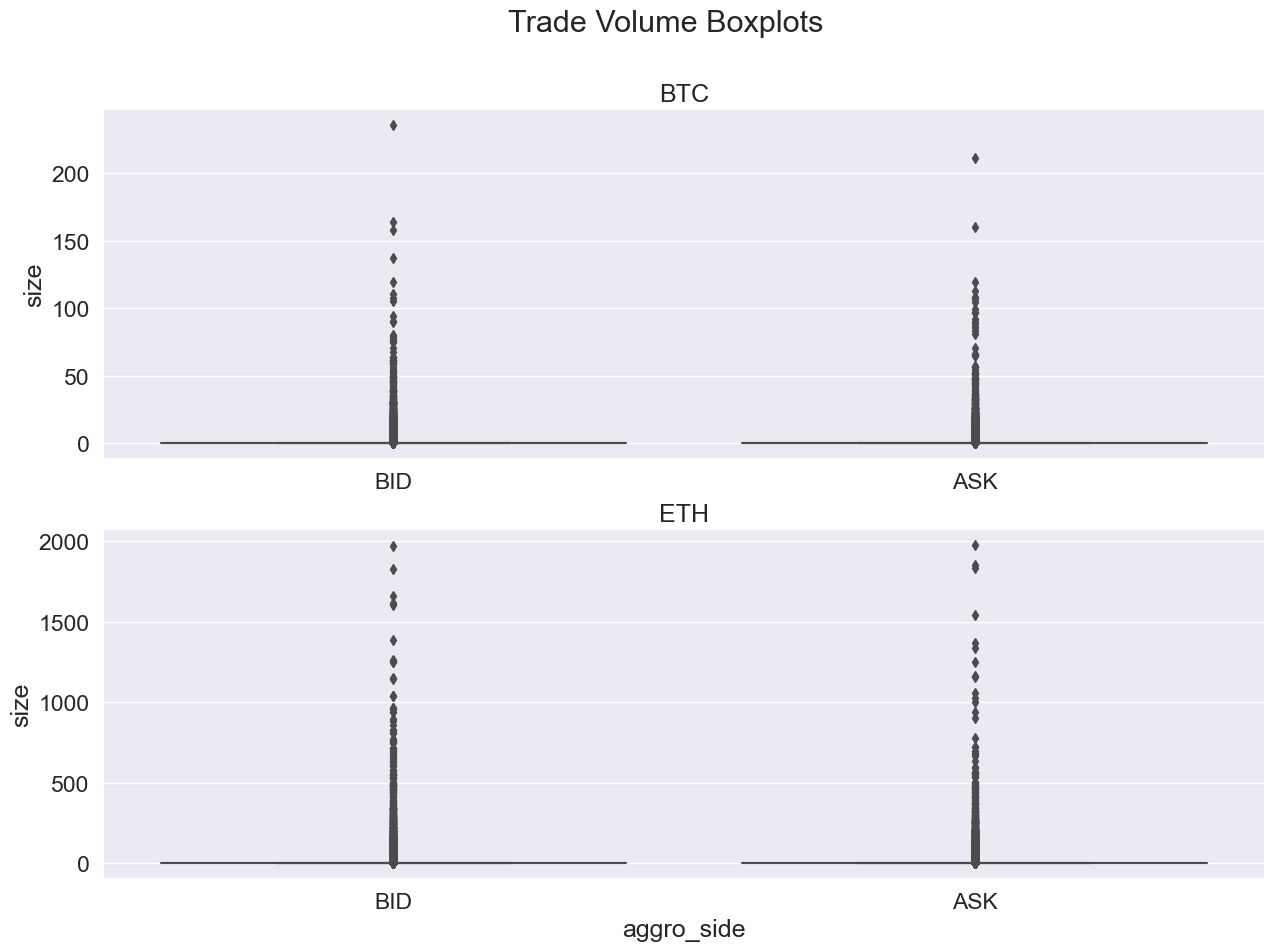

In [17]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))
sns.boxplot(y='size', x='aggro_side', data=btc_trades_df, ax=axes[0])
sns.boxplot(y='size', x='aggro_side', data=eth_trades_df, ax=axes[1])
axes[0].set_title('BTC')
axes[1].set_title('ETH')
axes[0].set_xlabel(None)
plt.suptitle('Trade Volume Boxplots', fontsize=22);

Боксплоты выглядят не очень информативно, так как почти вся вероятностная масса находится около нуля, при этом есть достаточно большое количество выбросов.

In [18]:
btc_trades_df['usdt_volume'] = btc_trades_df['size'] * btc_trades_df['price']
eth_trades_df['usdt_volume'] = eth_trades_df['size'] * eth_trades_df['price']

In [19]:
btc_trades_df[['usdt_volume', 'size']].describe(percentiles=[0.05, 0.95])

,usdt_volume,size
count,5.727714e+06,5.727714e+06
mean,2.509534e+03,1.220080e-01
std,1.152765e+04,5.596711e-01
min,0.000000e+00,1.000000e-03
5%,2.033650e+01,1.000000e-03
50%,3.581896e+02,1.700000e-02
95%,1.067810e+04,5.190000e-01
max,4.930337e+06,2.357930e+02


*0 в min USDT получается из-за одного трейда с ценой = 0 (id = 5032612). Скорее всего это ошибка, поэтому удалим этот трейд*

In [20]:
btc_trades_df[btc_trades_df['usdt_volume'] == 0]

,receive_ts,exchange_ts,aggro_side,price,size,usdt_volume
5032612,2022-06-23 21:04:54.203729877,2022-06-23 21:04:54.202,BID,0.0,0.001,0.0


In [21]:
btc_trades_df = btc_trades_df[btc_trades_df.price != 0]

In [22]:
eth_trades_df[['usdt_volume', 'size']].describe(percentiles=[0.05, 0.95])

,usdt_volume,size
count,4.873803e+06,4.873803e+06
mean,1.347443e+03,1.219873e+00
std,6.995788e+03,6.333830e+00
min,1.044970e+00,1.000000e-03
5%,5.427250e+00,5.000000e-03
50%,1.695955e+02,1.530000e-01
95%,5.500235e+03,5.000000e+00
max,2.187420e+06,1.976214e+03


Итоговая таблица выглядит следующим образом:

|  **statistics** 	| **BTC** 	|               	| **ETH**  	|              	|
|:---------------:	|---------	|---------------	|----------	|--------------	|
|                 	|  *BTC*  	|     *USDT*    	|   *ETH*  	|    *USDT*    	|
| *count*         	| 5727714 	|    5727714    	|  4873803 	|    4873803   	|
| *min*           	|  0.001  	|     19.594    	|   0.001  	|     1.045    	|
| *max*           	| 235.793 	|  4930337.313  	| 1976.214 	|  2187420.125 	|
| *quantile 0.05* 	|   0.01  	|     20.337    	|   0.005  	|     5.427    	|
| *quantile 0.95* 	|  0.519  	|   10678.100   	|    5.0   	|   5500.235   	|
| *median*        	|  0.017  	|    358.190    	|   0.153  	|    169.596   	|
| *mean*          	|  0.122  	|    2509.534   	|   1.220  	|   1347.443   	|
| *std*           	|  0.560  	|   11527.648   	|   6.334  	|   6995.788   	|
| *var*           	|  0.313  	| 132886668.953 	|  40.117  	| 48941055.404 	|

В штуках ETH торгуется, конечно, больше, чем BTC, однако в денежном выражении объёмы по BTC примерно в два раза выше. 

# Histograms

## Trades

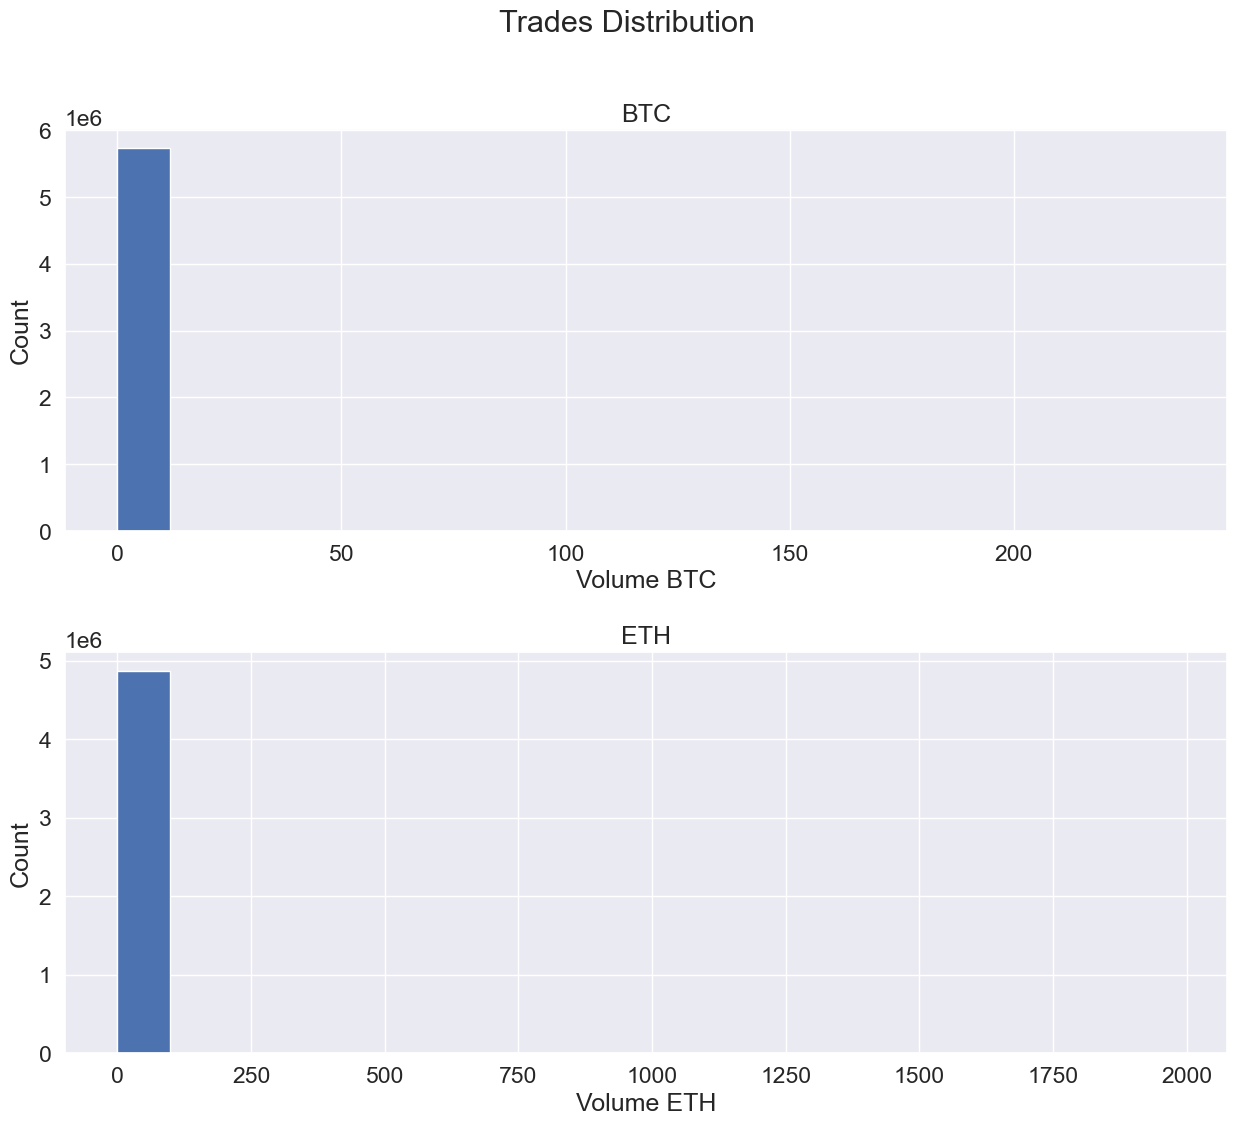

In [23]:
fig, axes = plt.subplots(nrows=2, figsize=(15,12))

btc_trades_df.hist(column='size', bins=20, ax=axes[0])
eth_trades_df.hist(column='size', bins=20, ax=axes[1])

plt.suptitle("Trades Distribution", fontsize=22)
axes[0].set_title('BTC')
axes[0].set_xlabel('Volume BTC')
axes[0].set_ylabel('Count')

axes[1].set_title('ETH')
axes[1].set_xlabel('Volume ETH')
axes[1].set_ylabel('Count');

Очень тяжелый хвост. Рассмотрим только те трейды, которые не превышают 99-й процентиль.

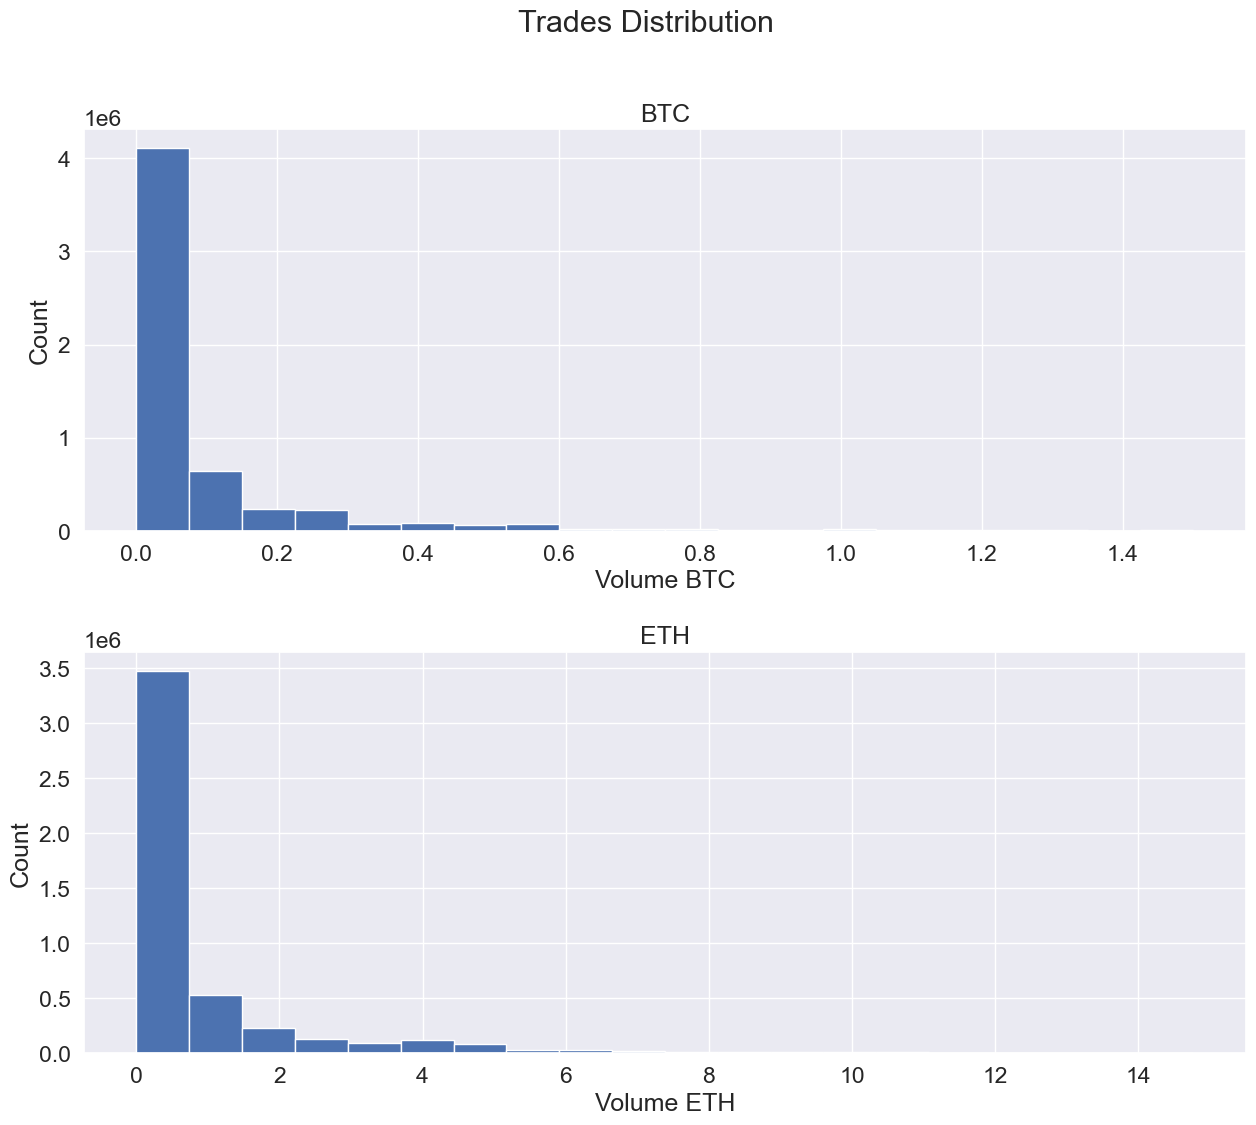

In [112]:
fig, axes = plt.subplots(nrows=2, figsize=(15,12))

btc_trades_df[btc_trades_df['size'] <= 
              btc_trades_df['size'].quantile(0.99)].hist(column='size', bins=20, ax=axes[0])
eth_trades_df[eth_trades_df['size'] <= 
              eth_trades_df['size'].quantile(0.99)].hist(column='size', bins=20, ax=axes[1])

plt.suptitle("Trades Distribution", fontsize=22)
axes[0].set_title('BTC')
axes[0].set_xlabel('Volume BTC')
axes[0].set_ylabel('Count')

axes[1].set_title('ETH')
axes[1].set_xlabel('Volume ETH')
axes[1].set_ylabel('Count');

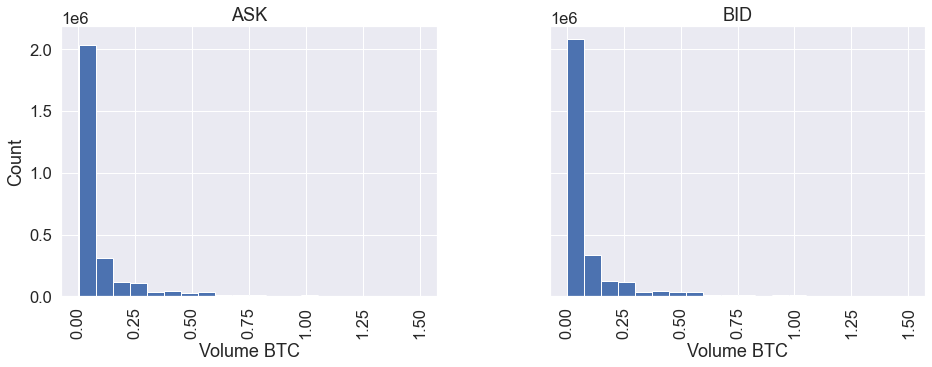

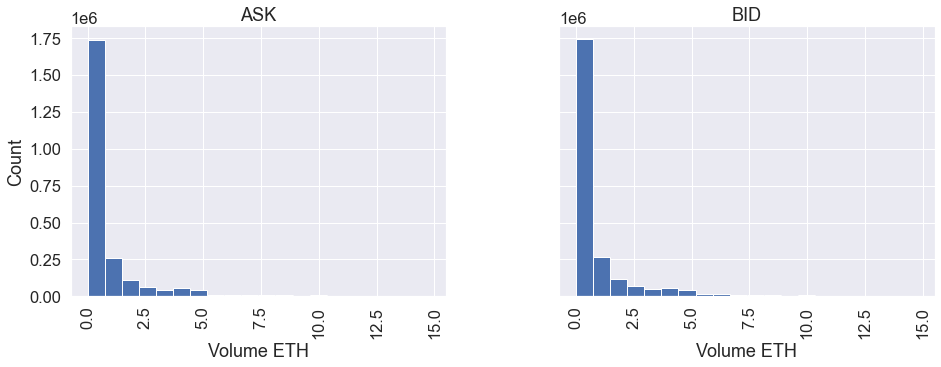

In [24]:
ax_0 = btc_trades_df[btc_trades_df['size'] <= 
              btc_trades_df['size'].quantile(0.99)].hist(column='size', by='aggro_side',
                                                         sharex=True, sharey=True, bins=20, figsize=(15,5))
ax_1 = eth_trades_df[eth_trades_df['size'] <= 
              eth_trades_df['size'].quantile(0.99)].hist(column='size', by='aggro_side',
                                                         sharex=True, sharey=True, bins=20, figsize=(15,5))

for ax in ax_0.flatten():
    ax.set_xlabel("Volume BTC")
    ax.set_ylabel("Count")
    
for ax in ax_1.flatten():
    ax.set_xlabel("Volume ETH")
    ax.set_ylabel("Count")

Если рассмотреть только те трейды, размер которых не превышает 99-й перцентиль, то на первый взгляд кажется, что распределения для ASK BID особо не различаются. То есть распределения объёмов продажи и покупки не сильно отличаются. Что же касается различий между BTC и ETH, то кажется, что распределения немного отличаются.

## LOB

In [25]:
btc_bid_cum_vol = btc_lobs_df[[f'bid_vol_{i}' for i in range(5)]].cumsum(axis=1)
btc_ask_cum_vol = btc_lobs_df[[f'ask_vol_{i}' for i in range(5)]].cumsum(axis=1)
btc_cum_vol_df = pd.concat([btc_bid_cum_vol, btc_ask_cum_vol], axis=1)
btc_cum_vol_df.insert(0, column='exhange_ts', value=btc_lobs_df['exchange_ts'].values)
btc_cum_vol_df.set_index('exhange_ts', inplace=True)

eth_bid_cum_vol = eth_lobs_df[[f'bid_vol_{i}' for i in range(5)]].cumsum(axis=1)
eth_ask_cum_vol = eth_lobs_df[[f'ask_vol_{i}' for i in range(5)]].cumsum(axis=1)
eth_cum_vol_df = pd.concat([eth_bid_cum_vol, eth_ask_cum_vol], axis=1)
eth_cum_vol_df.insert(0, column='exhange_ts', value=eth_lobs_df['exchange_ts'].values)
eth_cum_vol_df.set_index('exhange_ts', inplace=True)

Перед тем как строить гистогрммы, посмотрим, как ведут себя объёмы уровней во времени.

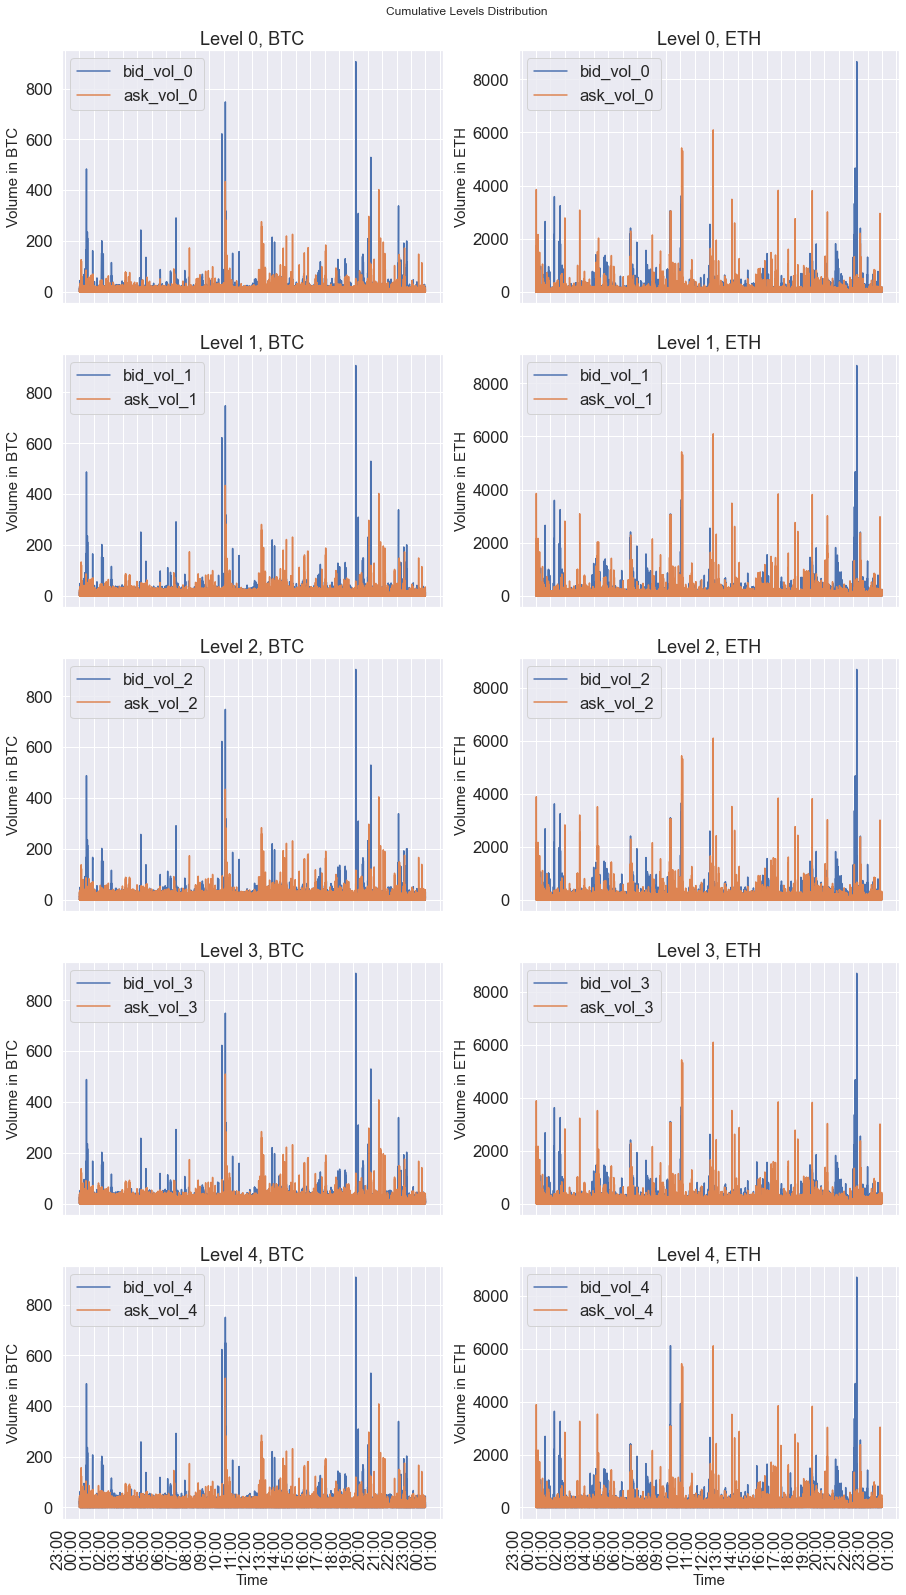

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 30), sharex=True)
fig.suptitle('Cumulative Levels Distribution', y=0.9)
for level in range(5):
    btc_cum_vol_df[[f'bid_vol_{level}', f'ask_vol_{level}']].plot(ax=axes[level][0])
    eth_cum_vol_df[[f'bid_vol_{level}', f'ask_vol_{level}'] ].plot(ax=axes[level][1])
    
    axes[level][0].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[level][0].set_title(f'Level {level}, BTC')
    axes[level][0].set_ylabel('Volume in BTC', fontsize=15)
    
    axes[level][1].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[level][1].set_title(f'Level {level}, ETH')
    axes[level][1].set_ylabel('Volume in ETH', fontsize=15)
axes[4][0].set_xlabel('Time', fontsize=15)
axes[4][1].set_xlabel('Time', fontsize=15);

plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
for label in axes[4][0].get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
for label in axes[4][1].get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')

Какую-то сезонность внутри дня выявить тяжело (тем более, что у нас данные только за один день), однако всплески в начале, середине и конце дня кажутся подозрительными. Если смотреть на самый большой всплеск в конце дня (имеется в виду со стороны BID), то такой всплеск был и для BTC и для ETH, однако для ETH это произошло на три часа позже.

Опять же из-за толстого правого хвоста гистограммы получаются не информативными, поэтому сразу будем смотреть на распрделение объёмов, не превыщающих 99-й перцентиль.

In [35]:
btc_cum_vol_df_99 = btc_cum_vol_df[(btc_cum_vol_df.bid_vol_4 < btc_cum_vol_df.bid_vol_4.quantile(0.99)) &
                                   (btc_cum_vol_df.ask_vol_4 < btc_cum_vol_df.ask_vol_4.quantile(0.99))]
eth_cum_vol_df_99 = eth_cum_vol_df[(eth_cum_vol_df.bid_vol_4 < eth_cum_vol_df.bid_vol_4.quantile(0.99)) &
                                   (eth_cum_vol_df.ask_vol_4 < eth_cum_vol_df.ask_vol_4.quantile(0.99))]


fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 30))
fig.suptitle('Cumulative Levels Distribution', y=0.9)
for level in range(5):
    btc_cum_vol_df_99[[f'bid_vol_{level}', f'ask_vol_{level}']].plot.hist(alpha=0.5, ax=axes[level][0])
    eth_cum_vol_df_99[[f'bid_vol_{level}', f'ask_vol_{level}']].plot.hist(alpha=0.5, ax=axes[level][1])
    
    axes[level][0].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[level][0].set_title(f'Level {level}, BTC')
    axes[level][0].set_ylabel('Count', fontsize=15)
    
    axes[level][1].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[level][1].set_title(f'Level {level}, ETH')
axes[4][0].set_xlabel('Volume', fontsize=15)
axes[4][1].set_xlabel('Volume', fontsize=15);

Здесь можно отметить, что с каждым следующим уровнем распределение кумулятивного объёма становится более пологим.

# Best price changing

In [28]:
btc_trades_df.set_index('exchange_ts', inplace=True)

btc_trades_ms_df_bid = pd.DataFrame({
    'price': btc_trades_df[btc_trades_df.aggro_side == 'BID'].price.resample('1ms').last(),
    'btc_volume': btc_trades_df[btc_trades_df.aggro_side == 'BID']['size'].resample('1ms').sum(),
    'usdt_volume': btc_trades_df[btc_trades_df.aggro_side == 'BID']['usdt_volume'].resample('1ms').sum(),
    'aggro_side': 'BID'
}).dropna()

btc_trades_ms_df_ask = pd.DataFrame({
    'price': btc_trades_df[btc_trades_df.aggro_side == 'ASK'].price.resample('1ms').last(),
    'btc_volume': btc_trades_df[btc_trades_df.aggro_side == 'ASK']['size'].resample('1ms').sum(),
    'usdt_volume': btc_trades_df[btc_trades_df.aggro_side == 'ASK']['usdt_volume'].resample('1ms').sum(),
    'aggro_side': 'ASK'
}).dropna()

btc_trades_ms_df_bid['price_changing'] = btc_trades_ms_df_bid.price - btc_trades_ms_df_bid.price.shift()
btc_trades_ms_df_bid['price_changing'].fillna(0, inplace=True)

btc_trades_ms_df_ask['price_changing'] = btc_trades_ms_df_ask.price - btc_trades_ms_df_ask.price.shift()
btc_trades_ms_df_ask['price_changing'].fillna(0, inplace=True)

In [29]:
eth_trades_df.set_index('exchange_ts', inplace=True)

eth_trades_ms_df_bid = pd.DataFrame({
    'price': eth_trades_df[eth_trades_df.aggro_side == 'BID'].price.resample('1ms').last(),
    'eth_volume': eth_trades_df[eth_trades_df.aggro_side == 'BID']['size'].resample('1ms').sum(),
    'usdt_volume': eth_trades_df[eth_trades_df.aggro_side == 'BID']['usdt_volume'].resample('1ms').sum(),
    'aggro_side': 'BID'
}).dropna()

eth_trades_ms_df_ask = pd.DataFrame({
    'price': eth_trades_df[eth_trades_df.aggro_side == 'ASK'].price.resample('1ms').last(),
    'eth_volume': eth_trades_df[eth_trades_df.aggro_side == 'ASK']['size'].resample('1ms').sum(),
    'usdt_volume': eth_trades_df[eth_trades_df.aggro_side == 'ASK']['usdt_volume'].resample('1ms').sum(),
    'aggro_side': 'ASK'
}).dropna()

eth_trades_ms_df_bid['price_changing'] = eth_trades_ms_df_bid.price - eth_trades_ms_df_bid.price.shift()
eth_trades_ms_df_bid['price_changing'].fillna(0, inplace=True)

eth_trades_ms_df_ask['price_changing'] = eth_trades_ms_df_ask.price - eth_trades_ms_df_ask.price.shift()
eth_trades_ms_df_ask['price_changing'].fillna(0, inplace=True)

Момент, который стоит отметить, это небольшие трейды, скажем, до 100 USDT, которым соотвествует изменение цены. Очевидно, что это изменение цены вызвано не самим этим трейдом, а какому-то количеству предшествующих трейдов с большим объёмом, или же просто произошло информативное движение рынка, и такой случай называть "пробитием" стакана, насколько я понимаю, некорректно. Учесть это в анализе достаточно тяжело, поэтому для визуализации решено было просто убрать такие трейды.

Помимо этого, присутствуют случаи огромного изменения цены (например, на 1000 USDT для BTC), при том, что размер сделок в это время был небольшой. Такие ситуации мы тоже уберём с графиков, иначе из-за масштаба практически ничего видно не будет. К тому же скорее всего эти изменения в цене были вызваны информативными шоками, а не самими трейдами.

Для BID трейдов (то есть когда забирается ask ликвидность) "пробитие" стакана означает увеличение цены, в связи с этим, берём только те записи, для которых *btc_trades_ms_df_bid.price_changing > 0*. Для ASK ситуация противоположная.

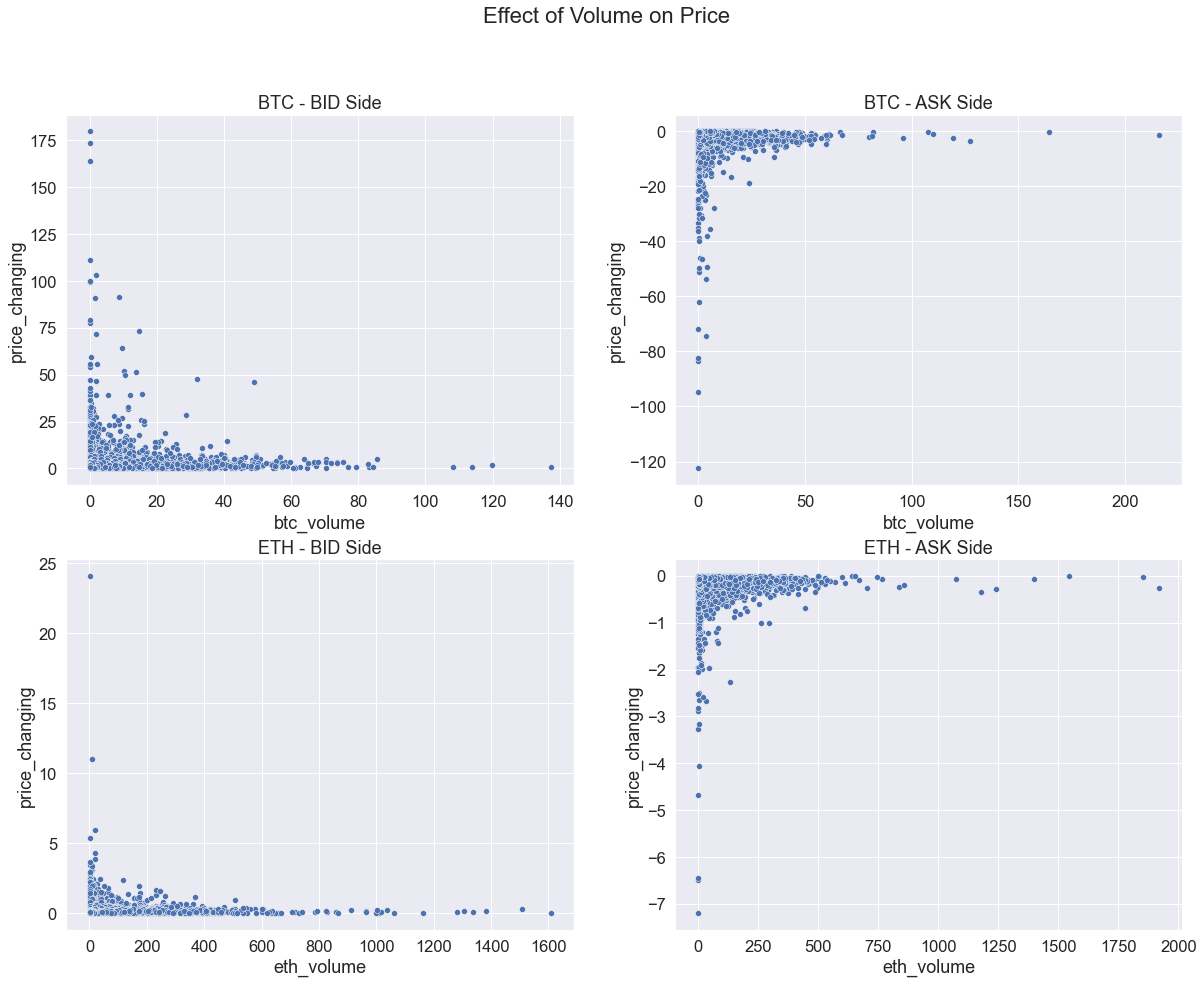

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
plt.suptitle('Effect of Volume on Price', fontsize=22)

sns.scatterplot(data=btc_trades_ms_df_bid[(btc_trades_ms_df_bid.price_changing > 0) &
                                          (btc_trades_ms_df_bid.price_changing < 200) &
                                          (btc_trades_ms_df_bid.usdt_volume > 100)],
                x='btc_volume', y='price_changing', ax=axes[0][0]);
axes[0][0].set_title('BTC - BID Side')
sns.scatterplot(data=btc_trades_ms_df_ask[(btc_trades_ms_df_ask.price_changing < 0) &
                                          (btc_trades_ms_df_ask.price_changing > -200) &
                                          (btc_trades_ms_df_ask.usdt_volume > 100)],
                x='btc_volume', y='price_changing', ax=axes[0][1]);
axes[0][1].set_title('BTC - ASK Side')

sns.scatterplot(data=eth_trades_ms_df_bid[(eth_trades_ms_df_bid.price_changing > 0) &
                                          (eth_trades_ms_df_bid.price_changing < 25) &
                                          (eth_trades_ms_df_bid.usdt_volume > 100)],
                x='eth_volume', y='price_changing', ax=axes[1][0]);
axes[1][0].set_title('ETH - BID Side')
sns.scatterplot(data=eth_trades_ms_df_ask[(eth_trades_ms_df_ask.price_changing < 0) &
                                          (eth_trades_ms_df_ask.price_changing > -25) &
                                          (eth_trades_ms_df_ask.usdt_volume > 100)],
                x='eth_volume', y='price_changing', ax=axes[1][1]);
axes[1][1].set_title('ETH - ASK Side');

Ожидаемой прямой зависимости не наблюдается. Также стоит отметить некоторые аномальные трейды, когда огромный объём не привел к изменению цены:

In [31]:
btc_trades_ms_df_bid[528585:528600]

,price,btc_volume,usdt_volume,aggro_side,price_changing
exchange_ts,,,,,
2022-06-23 12:38:08.059,20638.5,2.591,5.347435e+04,BID,0.0
2022-06-23 12:38:08.074,20638.5,3.604,7.438110e+04,BID,0.0
2022-06-23 12:38:08.078,20638.5,4.035,8.327635e+04,BID,0.0
2022-06-23 12:38:08.084,20638.5,12.858,2.653698e+05,BID,0.0
2022-06-23 12:38:08.086,20638.5,4.315,8.905513e+04,BID,0.0
2022-06-23 12:38:08.091,20638.5,122.113,2.520229e+06,BID,0.0
2022-06-23 12:38:08.092,20638.5,1.397,2.883198e+04,BID,0.0
2022-06-23 12:38:08.100,20638.5,2.680,5.531118e+04,BID,0.0
2022-06-23 12:38:08.105,20638.5,0.001,2.063850e+01,BID,0.0


# BTC & ETH Connection

In [32]:
btc_lobs_sec_df = btc_lobs_df.set_index('exchange_ts').resample('1s').mean()
eth_lobs_sec_df = eth_lobs_df.set_index('exchange_ts').resample('1s').mean()

In [33]:
btc_eth_midprice = pd.concat([(btc_lobs_sec_df.ask_price_0 + btc_lobs_sec_df.bid_price_0) / 2,
                              (eth_lobs_sec_df.ask_price_0 + eth_lobs_sec_df.bid_price_0) / 2], axis=1)

In [34]:
btc_eth_midprice.corr()

,0,1
0,1.000000,0.940169
1,0.940169,1.000000


Очень высокая корреляция, что совпадает с визуальными выводами о схожести динамики цены на BTC и ETH

Посмотрим теперь на объёмы. Сначала попробуем поискать корреляцию на 1 секундых данных. 

In [35]:
btc_vol_1s = btc_cum_vol_df.resample('1s')[['bid_vol_0', 'ask_vol_0']].sum()
eth_vol_1s = eth_cum_vol_df.resample('1s')[['bid_vol_0', 'ask_vol_0']].sum()

In [36]:
print('BID Correlation =', eth_vol_1s.bid_vol_0.corr(btc_vol_1s.bid_vol_0))
print('ASK Correlation =',eth_vol_1s.ask_vol_0.corr(btc_vol_1s.ask_vol_0))

BID Correlation = 0.07365270974564751
ASK Correlation = 0.10876105481653904


Корреляция на секундых данных небольшая, попробуем поискать корреляции с лагами.

In [37]:
btc_lagged_on_eth_bid_1s = [eth_vol_1s.bid_vol_0.corr(btc_vol_1s.bid_vol_0.shift(lag)) for lag in range(1, 301)]
eth_lagged_on_btc_bid_1s = [btc_vol_1s.bid_vol_0.corr(eth_vol_1s.bid_vol_0.shift(lag)) for lag in range(1, 301)]

btc_lagged_on_eth_ask_1s = [eth_vol_1s.ask_vol_0.corr(btc_vol_1s.ask_vol_0.shift(lag)) for lag in range(1, 301)]
eth_lagged_on_btc_ask_1s = [btc_vol_1s.ask_vol_0.corr(eth_vol_1s.ask_vol_0.shift(lag)) for lag in range(1, 301)]

In [38]:
print(f'Max Lagged BTC on ETH BID: lag = {np.argmax(btc_lagged_on_eth_bid_1s) + 1}, corr = {np.max(btc_lagged_on_eth_bid_1s)}')
print(f'Max Lagged BTC on ETH ASK: lag = {np.argmax(btc_lagged_on_eth_ask_1s) + 1}, corr = {np.max(btc_lagged_on_eth_ask_1s)}')
print()
print(f'Max Lagged ETH on BTC BID: lag = {np.argmax(eth_lagged_on_btc_bid_1s) + 1}, corr = {np.max(eth_lagged_on_btc_bid_1s)}')
print(f'Max Lagged ETH on BTC ASK: lag = {np.argmax(eth_lagged_on_btc_ask_1s) + 1}, corr = {np.max(eth_lagged_on_btc_ask_1s)}')

Max Lagged BTC on ETH BID: lag = 1, corr = 0.04083591947105685
Max Lagged BTC on ETH ASK: lag = 1, corr = 0.07196718866040935

Max Lagged ETH on BTC BID: lag = 1, corr = 0.04347010956534452
Max Lagged ETH on BTC ASK: lag = 1, corr = 0.06995674555866367


Корреляции на секундных объёмах почти не наблюдается. Посмотрим теперь на минутные объёмы

In [39]:
btc_vol_60s = btc_cum_vol_df.resample('60s')[['bid_vol_0', 'ask_vol_0']].sum()
eth_vol_60s = eth_cum_vol_df.resample('60s')[['bid_vol_0', 'ask_vol_0']].sum()

In [40]:
print('BID Correlation =', eth_vol_60s.bid_vol_0.corr(btc_vol_60s.bid_vol_0))
print('ASK Correlation =',eth_vol_60s.ask_vol_0.corr(btc_vol_60s.ask_vol_0))

BID Correlation = 0.10878002028764062
ASK Correlation = 0.2522438332468156


Корреляция на минутных данных побольше, однако всё ещё низкая. Попробуем поискать корреляции с лагами.

In [41]:
btc_lagged_on_eth_bid_60s = [eth_vol_60s.bid_vol_0.corr(btc_vol_60s.bid_vol_0.shift(lag)) for lag in range(1, 61)]
eth_lagged_on_btc_bid_60s = [btc_vol_60s.bid_vol_0.corr(eth_vol_60s.bid_vol_0.shift(lag)) for lag in range(1, 61)]

btc_lagged_on_eth_ask_60s = [eth_vol_60s.ask_vol_0.corr(btc_vol_60s.ask_vol_0.shift(lag)) for lag in range(1, 61)]
eth_lagged_on_btc_ask_60s = [btc_vol_60s.ask_vol_0.corr(eth_vol_60s.ask_vol_0.shift(lag)) for lag in range(1, 61)]

In [42]:
print(f'Max Lagged BTC on ETH BID: lag = {np.argmax(btc_lagged_on_eth_bid_60s) + 1}, corr = {np.max(btc_lagged_on_eth_bid_60s)}')
print(f'Max Lagged BTC on ETH ASK: lag = {np.argmax(btc_lagged_on_eth_ask_60s) + 1}, corr = {np.max(btc_lagged_on_eth_ask_60s)}')
print()
print(f'Max Lagged ETH on BTC BID: lag = {np.argmax(eth_lagged_on_btc_bid_60s) + 1}, corr = {np.max(eth_lagged_on_btc_bid_60s)}')
print(f'Max Lagged ETH on BTC ASK: lag = {np.argmax(eth_lagged_on_btc_ask_60s) + 1}, corr = {np.max(eth_lagged_on_btc_ask_60s)}')

Max Lagged BTC on ETH BID: lag = 8, corr = 0.21877572149481436
Max Lagged BTC on ETH ASK: lag = 11, corr = 0.2031651207629314

Max Lagged ETH on BTC BID: lag = 18, corr = 0.1379559343650224
Max Lagged ETH on BTC ASK: lag = 7, corr = 0.15437940471062844


Корреляция на минутных объёмах всё ещё достаточно низкая. Посмотрим ещё на 30 минутные объёмы

In [43]:
btc_vol_30m = btc_cum_vol_df.resample('30Min')[['bid_vol_0', 'ask_vol_0']].sum()
eth_vol_30m = eth_cum_vol_df.resample('30Min')[['bid_vol_0', 'ask_vol_0']].sum()

In [44]:
print('BID Correlation =', eth_vol_30m.bid_vol_0.corr(btc_vol_30m.bid_vol_0))
print('ASK Correlation =',eth_vol_30m.ask_vol_0.corr(btc_vol_30m.ask_vol_0))

BID Correlation = 0.5472553771099945
ASK Correlation = 0.637326895009618


Корреляция на 30-минутных данных уже существенная. Попробуем поискать корреляции с лагами.

In [45]:
btc_lagged_on_eth_bid_30m = [eth_vol_30m.bid_vol_0.corr(btc_vol_30m.bid_vol_0.shift(lag)) for lag in range(1, 11)]
eth_lagged_on_btc_bid_30m = [btc_vol_30m.bid_vol_0.corr(eth_vol_30m.bid_vol_0.shift(lag)) for lag in range(1, 11)]

btc_lagged_on_eth_ask_30m = [eth_vol_30m.ask_vol_0.corr(btc_vol_30m.ask_vol_0.shift(lag)) for lag in range(1, 11)]
eth_lagged_on_btc_ask_30m = [btc_vol_30m.ask_vol_0.corr(eth_vol_30m.ask_vol_0.shift(lag)) for lag in range(1, 11)]

In [46]:
print(f'Max Lagged BTC on ETH BID: lag = {np.argmax(btc_lagged_on_eth_bid_30m) + 1}, corr = {np.max(btc_lagged_on_eth_bid_30m)}')
print(f'Max Lagged BTC on ETH ASK: lag = {np.argmax(btc_lagged_on_eth_ask_30m) + 1}, corr = {np.max(btc_lagged_on_eth_ask_30m)}')
print()
print(f'Max Lagged ETH on BTC BID: lag = {np.argmax(eth_lagged_on_btc_bid_30m) + 1}, corr = {np.max(eth_lagged_on_btc_bid_30m)}')
print(f'Max Lagged ETH on BTC ASK: lag = {np.argmax(eth_lagged_on_btc_ask_30m) + 1}, corr = {np.max(eth_lagged_on_btc_ask_30m)}')

Max Lagged BTC on ETH BID: lag = 1, corr = 0.3338993067490619
Max Lagged BTC on ETH ASK: lag = 1, corr = 0.5109024150010264

Max Lagged ETH on BTC BID: lag = 1, corr = 0.31660171953374233
Max Lagged ETH on BTC ASK: lag = 1, corr = 0.466438959261385


Какого-то отставания так найти и не удалось. Стоит отметить, что корреляция выше для ASK стороны.